In [33]:
import hmmlearn.hmm as hmm
import numpy as np

In [2]:
# get arbitration sequence
def get_arbid_seq(filepath):
  seq_li = list()
  with open(filepath, 'r') as f:
    lines = f.readlines()
    for line in lines:
      seq_li.append(line.split('\t')[1])
  arbID_seq = np.fromiter((int(x, 16) for x in seq_li), dtype=np.uint16)
  return arbID_seq



In [8]:
def get_split_arbid_seq_by_wnd(arbidseq, wndsize=5):
  splited = np.array([])
  cnt = 0
  for i in range(np.size(arbidseq)-wndsize+1):
    splited = np.append(splited, arbidseq[i:i+wndsize])
    cnt += 1
  splited = np.reshape(splited, (cnt, wndsize))
  return splited

In [9]:
train_arbID_seq = get_arbid_seq("./data/CAN traffic (normal only).txt")
tr_set = get_split_arbid_seq_by_wnd(train_arbID_seq)
test_arbID_seq = get_arbid_seq("./data/CAN traffic (attack included).txt")
te_set = get_split_arbid_seq_by_wnd(test_arbID_seq)

In [36]:
tr_set[0:10]

array([[ 608.,  809.,  909., 1056., 1057.],
       [ 809.,  909., 1056., 1057.,  339.],
       [ 909., 1056., 1057.,  339.,  544.],
       [1056., 1057.,  339.,  544.,  832.],
       [1057.,  339.,  544.,  832.,  905.],
       [ 339.,  544.,  832.,  905., 1151.],
       [ 544.,  832.,  905., 1151.,  304.],
       [ 832.,  905., 1151.,  304.,  320.],
       [ 905., 1151.,  304.,  320.,  593.],
       [1151.,  304.,  320.,  593.,  688.]])

In [29]:
h = hmm.GaussianHMM(n_components=2, covariance_type="diag")
print('---------------')
h.fit(tr_set)
print(h.score(tr_set))
print(h.score(te_set))
print('---------------')
print(h.startprob_)
print(h.transmat_)
print(h.means_)
print(h.covars_)

---------------
-6265543.901194307
-29072804.457702596
---------------
[1.00000000e+00 2.54721602e-10]
[[0.84543986 0.15456014]
 [0.0866854  0.9133146 ]]
[[889.48383864 934.61332154 965.90271652 994.07437923 985.45355493]
 [785.19253431 759.87924387 742.33106735 726.52421406 731.35325987]]
[[[ 18315.81507738      0.              0.              0.
        0.        ]
  [     0.          13816.82285696      0.              0.
        0.        ]
  [     0.              0.          18174.54841834      0.
        0.        ]
  [     0.              0.              0.          26557.18414269
        0.        ]
  [     0.              0.              0.              0.
    49833.96789975]]

 [[126270.84968836      0.              0.              0.
        0.        ]
  [     0.         121731.30018702      0.              0.
        0.        ]
  [     0.              0.         112297.42242726      0.
        0.        ]
  [     0.              0.              0.          99836.4145162
 

In [30]:
X, Z = h.sample(2500)

In [31]:
import matplotlib.pyplot as plt

C:\Users\wlsrn\anaconda3\lib\site-packages\matplotlib\ticker.py:2247: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


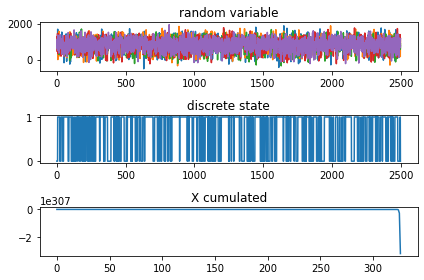

In [32]:
plt.subplot(311)
plt.plot(X)
plt.title("random variable")
plt.subplot(312)
plt.plot(Z)
plt.title("discrete state")
plt.subplot(313)
plt.plot((1 + 0.01*X).cumprod())
plt.title("X cumulated")
plt.tight_layout()
plt.show()

In [23]:
import seaborn as sns

C:\Users\wlsrn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


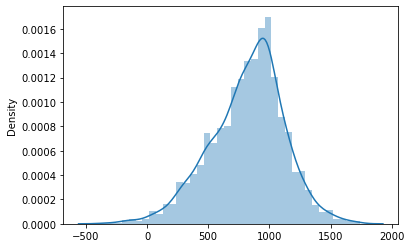

In [24]:
sns.distplot(X)
plt.show()

***Decode***

In [27]:
h2 = hmm.GaussianHMM(n_components=2, n_iter=len(X)).fit(X)
h2

GaussianHMM(n_components=2, n_iter=500)

In [28]:
Z_hat = h2.decode(X)[1]
X_cum = (1 + 0.01*X).cumprod()
X_cum_hat = X_cum.copy()
X_cum_hat[Z_hat == 0] = np.nan

IndexError: boolean index did not match indexed array along dimension 0; dimension is 2500 but corresponding boolean dimension is 500